In [301]:
import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [302]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
# vgg16.summary()

In [303]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [304]:
def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

In [305]:
def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [306]:
def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [307]:
def show_image(image_path):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()

In [308]:
def process_images(input_folder, post_folder):

    res = []

    for filename in os.listdir(input_folder):
        # if filename.endswith('.jpg'): 
        pre_image = os.path.join(input_folder, filename)
        post_image = os.path.join(post_folder, filename)
        similarity_score = get_similarity_score(pre_image, post_image)
        print(f"{filename}: {similarity_score}")

        if similarity_score < 0.9:
            res.append((filename, similarity_score[0]))
            show_image(pre_image), show_image(post_image)

    return res

In [309]:
import os

def process_images(input_folder, post_folder):

    res = []

    for filename in os.listdir(input_folder):
        if filename.endswith('.jpeg'): 
            pre_image = os.path.join(input_folder, filename)
            post_image = os.path.join(post_folder, filename)
            similarity_score = get_similarity_score(pre_image, post_image)
            print(f"{filename}: {similarity_score}")

            if similarity_score < 0.9:
                res.append((filename, similarity_score[0]))
                show_image(pre_image), show_image(post_image)

    return res

1/1 [==============================] - 0s 143ms/step
frame3.jpeg: [0.99336904]
1/1 [==============================] - 0s 131ms/step
frame2.jpeg: [0.9795257]
1/1 [==============================] - 0s 119ms/step
frame9.jpeg: [0.7072977]


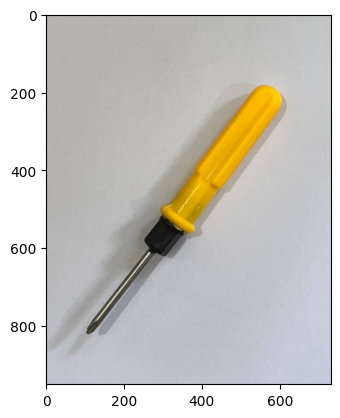

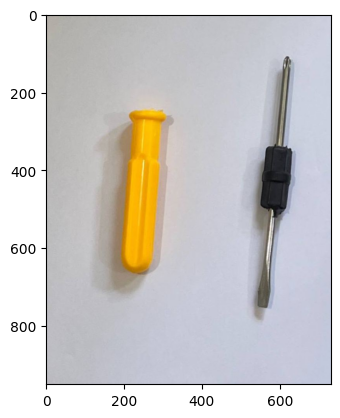

1/1 [==============================] - 0s 132ms/step
frame5.jpeg: [0.99999994]
1/1 [==============================] - 0s 128ms/step
frame4.jpeg: [0.9803722]
1/1 [==============================] - 0s 125ms/step
frame8.jpeg: [0.8781862]


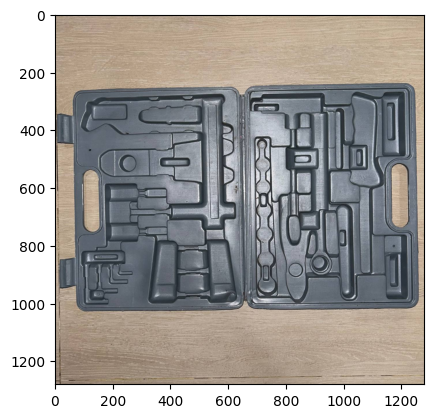

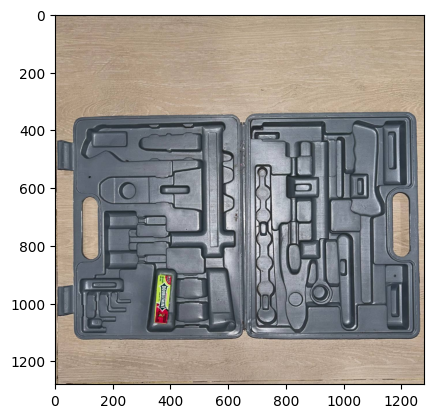

1/1 [==============================] - 0s 139ms/step
frame7.jpeg: [1.0000001]
1/1 [==============================] - 0s 123ms/step
frame6.jpeg: [0.9199537]
1/1 [==============================] - 0s 117ms/step
frame1.jpeg: [0.9804694]
[('frame8.jpeg', 0.8781862), ('frame9.jpeg', 0.7072977)]


In [310]:
res = process_images('./ref-pics/pre-pics/', './ref-pics/post-pics/')
print(sorted(res, key=lambda x: (-x[1], x[0])))